# Imports

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error


In [22]:
data = pd.read_csv(r"https://raw.githubusercontent.com/sergiomora03/Time-Series-Analysis-ARIMA-SARIMA-Prophet-LSTM/master/dataset/datasets_56102_107707_monthly-beer-production-in-austr.csv",
                   parse_dates=["Month"])
data.columns = ["ds","y"]

# Criando o Modelo

In [59]:
# Instanciando o modelo
m = Prophet()

# Splitando o dataset entre Treino/Teste
testSize = 3 # Em meses
train_set = data[:-testSize].copy()
test_set = data[-testSize:].iloc[:,:-1].copy()

# Treinando ele
model = m.fit(train_set)
forecastTest = m.predict(test_set)

18:36:09 - cmdstanpy - INFO - Chain [1] start processing
18:36:09 - cmdstanpy - INFO - Chain [1] done processing


# Visualizando o comportamento

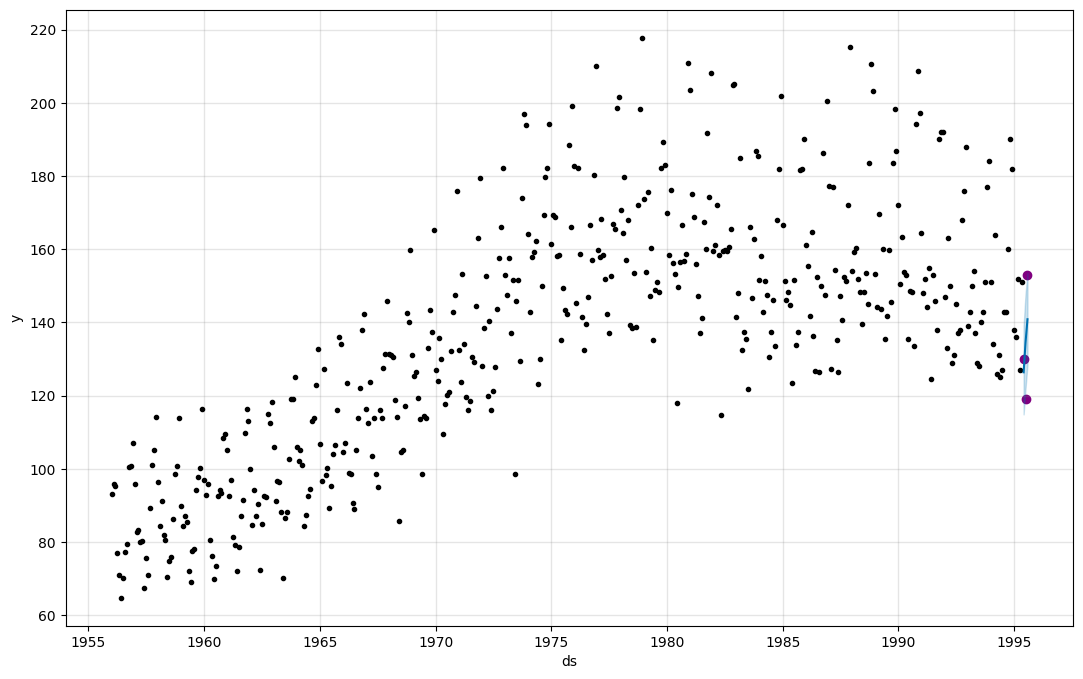

In [61]:
f, ax = plt.subplots(figsize=(13,8))
ax.scatter(data[-testSize:].ds,data[-testSize:].y,color='purple')
fig = m.plot(forecastTest,ax=ax)

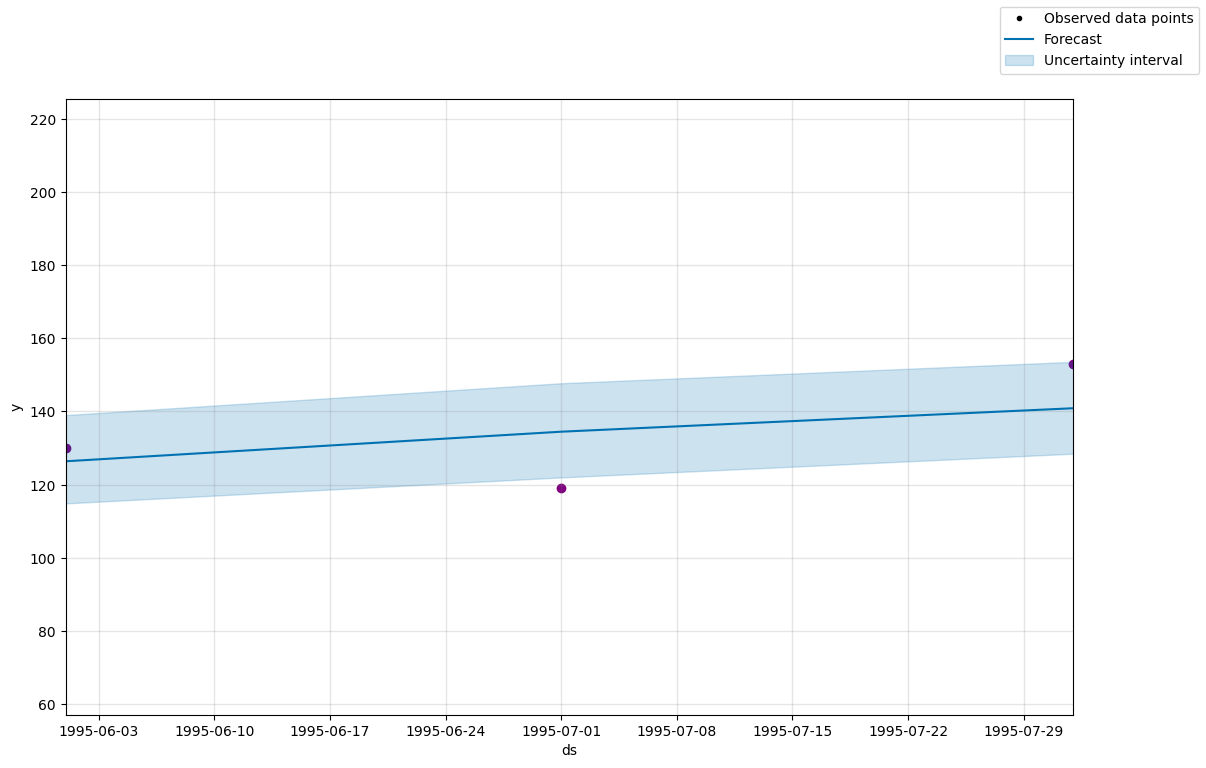

In [63]:
# Visualizando o que ele predictou com o valor real da época
f, ax = plt.subplots(figsize=(13,8))
ax.scatter(data[-testSize:].ds,data[-testSize:].y,color='purple')
fig = m.plot(forecastTest,ax=ax)
ax.set_xbound(lower=min(data[-testSize:].ds),upper=max(data[-testSize:].ds))
f.legend()

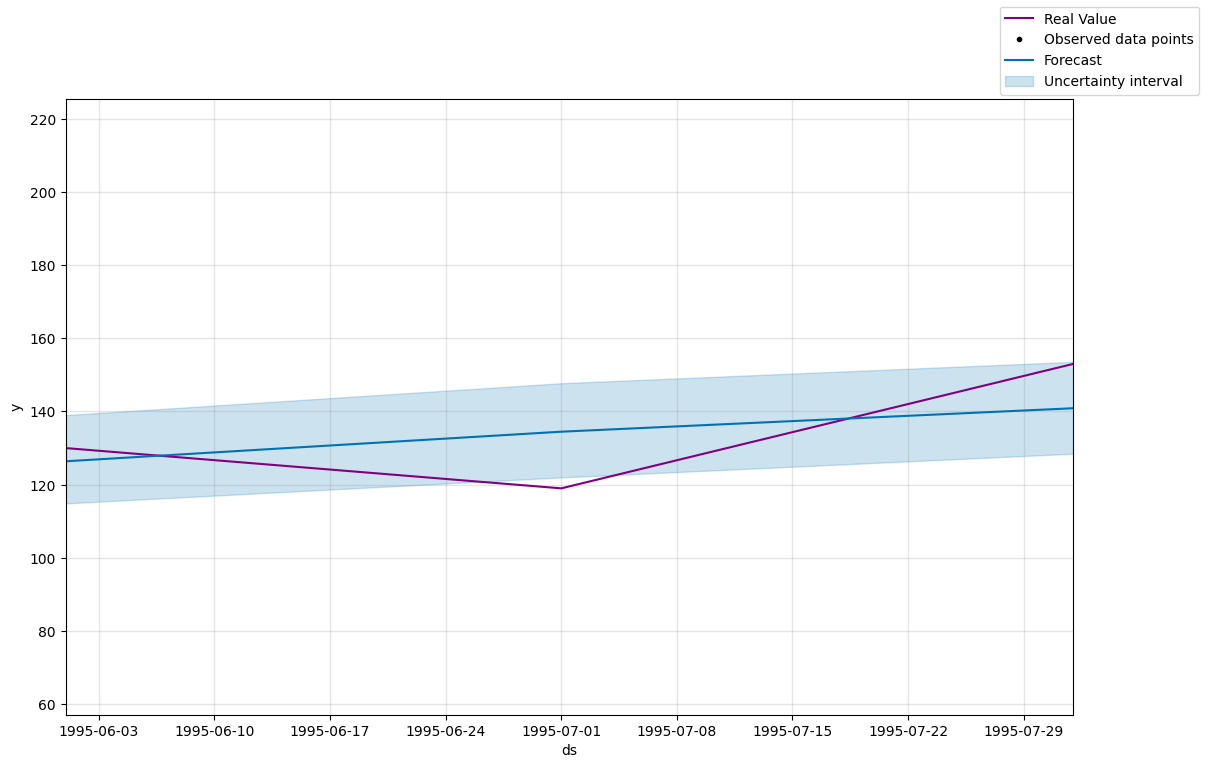

In [86]:
# Visualizando o que ele predictou com o valor real da época
f, ax = plt.subplots(figsize=(13,8))
ax.plot(data[-testSize:].ds,data[-testSize:].y,color='purple',label='Real Value')
fig = m.plot(forecastTest,ax=ax)
ax.set_xbound(lower=min(data[-testSize:].ds),upper=max(data[-testSize:].ds))
f.legend()

c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


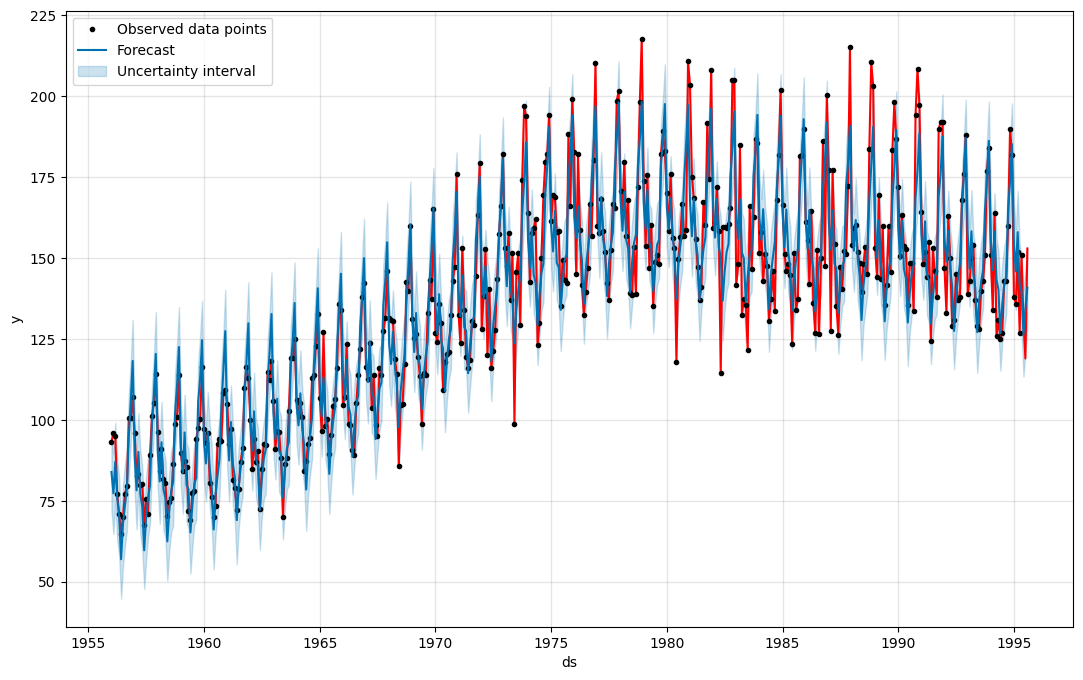

In [82]:
f, ax = plt.subplots(figsize=(13,8))
ax.plot(data.ds,data.y,color='r')
m.plot(m.predict(m.make_future_dataframe(periods=3,freq="MS")),ax=ax)
plt.legend()

# SKLearn Metrics

In [65]:
np.sqrt(mean_squared_error(y_true=data[-testSize:].y, y_pred=forecastTest.yhat))

11.536885570347028

In [66]:
mean_absolute_error(y_true=data[-testSize:].y, y_pred=forecastTest.yhat)

10.399207849830802

In [67]:
mean_absolute_percentage_error(y_true=data[-testSize:].y, y_pred=forecastTest.yhat)

0.07899309862432684